In [1]:
%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['animation.embed_limit'] = 2**128

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Potential functions
def force_goal(x, y, goal):
    goal_x, goal_y, k_goal = goal
    Fx_goal, Fy_goal = k_goal * (goal_x - x), k_goal *(goal_y - y)
    return Fx_goal, Fy_goal

def force_obstacle(x, y, obstacle):
    (obs_x, obs_y, k_obs) = obstacle
    dist_x, dist_y = x - obs_x, y - obs_y
    dist_obs = np.hypot(dist_x, dist_y)
    Fx_obs = (dist_x / dist_obs) * k_obs / dist_obs ** 3
    Fy_obs = (dist_y / dist_obs) * k_obs / dist_obs ** 3

    return Fx_obs, Fy_obs 

def total_force(x, y, goal, obstacles):
    Fx, Fy = force_goal(x, y, goal)

    for obs in obstacles:
        Fo_x, Fo_y = force_obstacle(x, y, obs)
        Fx += Fo_x
        Fy += Fo_y
    return Fx, Fy

In [40]:
 def plot_vector_field(ax=plt, fmax = 0.6):
    X, Y = np.meshgrid(np.arange(-10, 10, .5), np.arange(-10, 10, .5))

    # Vector field of the forces
    Fx, Fy = total_force(X, Y, goal, obstacles)

    # For visualization
    F_m = np.hypot(Fx, Fy)
    Fx[F_m > fmax], Fy[F_m > fmax] = None, None
    # Plot
    # quiver(X, Y, Fx, Fy,  F_m, color='0.4', scale=None)
    ax.quiver(X, Y, Fx, Fy, color='0.4')
    

    

def simulate(q, goal, obstacles, num_steps=200, delta_time=1.9):
    trajectory = []
    for i in range(num_steps):
        force = total_force(q[0], q[1], goal, obstacles)
        # Robot velocity follows the force vector
        vel = np.array(force)
        # Integrate
        q += vel * delta_time
        trajectory.append(np.copy(q))

    
    return np.array(trajectory)

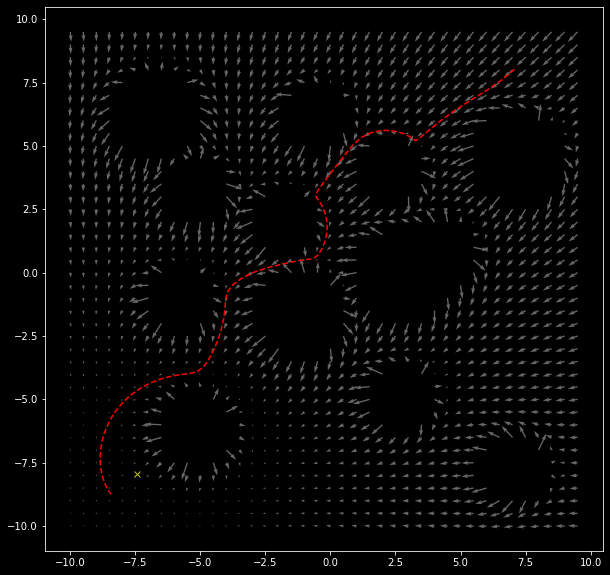

In [42]:
# Goal
goal = [-7.425, -7.925, 0.02]

# Obstacles (x, y, k), where k is the rejection multiplier
r1 = sqrt(square(4) + square(1))/2+0.4
r2 = 1/2+0.4

obstacles = [[2.725, -0.00000027, r1],
             [7.425, 4.725, r1],
             [-1.025, -1.5, r1],
             [-6.7, 6.4, r1],
             [-5.15, -6.2, 1.35],
             [2.425, 4.075, r2],
             [4.4, 0.875, r2],
             [2.825, -4.85, r2],
             [-0.525, 6.3, r2],
             [-5.125, 3.425, r2],
             [-1.775, 2.1, r2],
             [-5.8, -0.975, r2],
             [7.275, -7.75, r2]
              ]

# Initial location
q = np.array((7.625, 8.55))

# Show result
trajectory = simulate(q, goal, obstacles)
plot(trajectory[:,0], trajectory[:,1], 'r--')
plot(goal[0], goal[1], 'yx')
plot_vector_field()